In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

import model as NN
import dataloader as DL
import loss_function as loss

In [2]:
infile = open('C:/Users/OH/python/Laboratory/mnist.pkl', 'rb')
mnist_data = pickle.load(infile)
infile.close()

In [3]:
mnist_data.keys()

dict_keys(['Xtest', 'ytest', 'Xtrain', 'ytrain'])

In [4]:
batchsize = 20
train_loader = DL.dataLoader(mnist_data['Xtrain'], mnist_data['ytrain'], batchsize)
test_loader = DL.dataLoader(mnist_data['Xtest'], mnist_data['ytest'], batchsize)

In [5]:
model = NN.Network(400, 10, [50, 20, 30])
print(model.W['layer1'].shape)
print(model.W['layer2'].shape)
print(model.W['layer3'].shape)
print(model.W['layer4'].shape)

(400, 50)
(50, 20)
(20, 30)
(30, 10)


In [6]:
num_epochs = 100
training_loss = {}
training_accuracy = {}
num_train_batches = mnist_data['Xtrain'].shape[0] / batchsize
alpha = 0.01

ind = 0
for e in range(1, num_epochs + 1):
    train_loader = DL.dataLoader(mnist_data['Xtrain'], mnist_data['ytrain'], batchsize)
    training_loss.update({e : 0.0})
    training_accuracy.update({e: 0.0})
    
    for image, label in train_loader:
        
        pred = model.forward(image)

        model.backward(image, label)
        
        model.update(alpha)
        
        training_loss[e] += loss.crossentropy(pred, label)
        
        training_accuracy[e] += loss.ave_accuracy(pred, label)
        
    training_loss[e] = training_loss[e] / num_train_batches
    training_accuracy[e] = training_accuracy[e] / num_train_batches
    print(f'{e}th training loss = {training_loss[e]}\n{e}th training accuracy = {training_accuracy[e]}')

1th training loss = 2.2746578586106945
1th training accuracy = [0.1905]
2th training loss = 2.1866307551208406
2th training accuracy = [0.31725]
3th training loss = 2.035461921791288
3th training accuracy = [0.431]
4th training loss = 1.7748938393917877
4th training accuracy = [0.5085]
5th training loss = 1.4570528637375924
5th training accuracy = [0.55675]
6th training loss = 1.167054262844386
6th training accuracy = [0.65125]
7th training loss = 0.9368904976354684
7th training accuracy = [0.74]
8th training loss = 0.7773604382580269
8th training accuracy = [0.785]
9th training loss = 0.6746790942110005
9th training accuracy = [0.81125]
10th training loss = 0.606878906363226
10th training accuracy = [0.821]
11th training loss = 0.5603605523432982
11th training accuracy = [0.836]
12th training loss = 0.5258841077927048
12th training accuracy = [0.84275]
13th training loss = 0.4987855460684456
13th training accuracy = [0.85425]
14th training loss = 0.4758195774058331
14th training accur

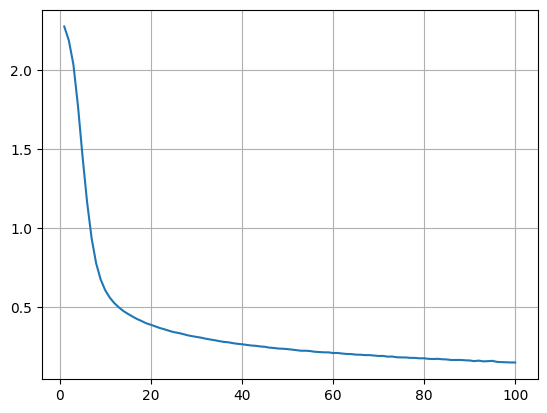

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(list(training_loss.keys()), list(training_loss.values()))
ax.grid()